In [1]:
import numpy as np
from sklearn.mixture import GaussianMixture

In [2]:
# ice = np.zeros((6, 6))
# ice[2, 3] = 100
# ice[3, 3] = 100
# ice[5, 4] = 100
# ice

In [3]:
rng = np.random.default_rng()

rubble = (rng.random((6, 6)) * 100).astype(int)

# rubble[ice.nonzero()] = 0

threshold = 20
rubble[rubble <= threshold] = 0
rubble

array([[53, 87, 85, 53, 95,  0],
       [64, 56,  0, 81, 84, 68],
       [31, 56, 41, 36, 78, 30],
       [81, 34, 34, 47, 63, 42],
       [65, 34,  0, 26,  0, 78],
       [73,  0, 87,  0, 47,  0]])

In [4]:
rubble_train = np.vstack(np.where(rubble.T == 0)).T
# ice_train = np.vstack(ice.T.nonzero()).T
rubble_train

array([[1, 5],
       [2, 1],
       [2, 4],
       [3, 5],
       [4, 4],
       [5, 0],
       [5, 5]])

In [5]:
# X_train = np.vstack([rubble_train, ice_train])

In [6]:
X_train = rubble_train
clf = GaussianMixture(
    n_components=len(X_train), 
    covariance_type="spherical", 
    init_params='kmeans', 
    means_init=rubble_train,
)

clf.fit(X_train)

GaussianMixture(covariance_type='spherical',
                means_init=array([[1., 5.],
       [2., 1.],
       [2., 4.],
       [3., 5.],
       [4., 4.],
       [5., 0.],
       [5., 5.]]),
                n_components=7)

In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [8]:
# display predicted scores by the model as a contour plot
x = np.linspace(0, 6)
y = np.linspace(0, 6)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

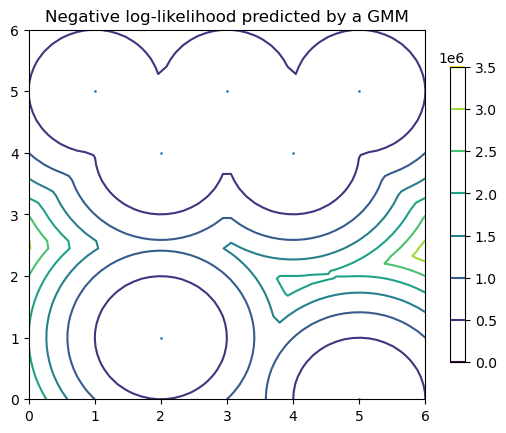

In [9]:
CS = plt.contour(
    X, Y, Z, # norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10)
)


CB = plt.colorbar(CS, shrink=0.8, extend="both")
plt.scatter(X_train[:, 0], X_train[:, 1], 0.8)

plt.title("Negative log-likelihood predicted by a GMM")
plt.axis("tight")
plt.show()